<img src="images/seattle.jpg">

# King County House Sales Analysis
Author: Jennifer Ha
***

## Overview placeholder
This analysis project explores trends in film business to provide Microsoft with actionable recommendations as they want to enter this business as well. we will review data sets from TheNumbers.com and IMDb to determine when Microsoft should release a movie, which types of genres to consider, and whom to recruit. The methodology includes filtering, and joining and visualizing data sets to show different trends in ROI. The result shows higher ROI when Mystery, Horror, and Animation movies are released in May-July, and November-December. I recommend Microsoft to partner with lists of top 10 actors and directors in those genres, and release movies during the summer (May-July) or holiday season (Nov-Dec).

## Business Problem placeholder
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.

In order to assist the stakeholders at Microsoft to make data-driven decisions for their new business, we will be reviewing and analyzing datasets to provide a viable and profitable business option. The findings and recommendations will help the stakeholders with better understanding of the movie industry, to decide when to release their movies and who to work with to drive a successful outcome.

나는 부동산 업체의 입장에서 어떠한 집들을 매물로 준비해야 더 이익을 볼 수 있는지 언제 deal을 close 하는게 좋을지

## Data
The dataset consists of ~21600 rows of real estate transaction from King County, Seattle (WA) from 2014-2015. The columns represent different features associated with each property, which are outlined below. The target variable is the price of the property, which will be used in our models to determine the winning model, along with features that have strong relationships with it.

Prior to iterating regression models and predictions, I conducted some exploratory data analyses to clean up the data using IQR method to prepare it for modeling, and went through several iterations to refine the model.

### Columns
* `id`: uniques identifier for a house
* `date`: date the house was sold
* `price`: prediction target
* `bedrooms`: number of bedrooms
* `bathrooms`: number of bathrooms
* `sqft_living`: square foot living space
* `sqft_lot`: square foot of lot
* `floors`: number of floors
* `waterfront`: house which has a view to a waterfront
* `view`: number of viewings
* `condition`: how good the condition is (overall)
* `grade`: overall grade given to the housing unit, based on King County grading system
* `sqft_above`: square footage of house apart from basement
* `sqft_basement`: square footage of the basement
* `yr_built`: Built Year
* `yr_renovated`: Year when house was renovated
* `zipcode`: zip
* `lat`: Latitude coordinate
* `long`: Longitude coordinate
* `sqft_living15`: The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15`: The square footage of the land lots of the nearest 15 neighbors

***

### Data Preparation & Clean Up

In [1]:
# Import all libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as pltcol
import seaborn as sns
#import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
#import statsmodels.tools.eval_measures as ev
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
#
from sklearn.model_selection import cross_val_score
from scipy.special import boxcox, inv_boxcox
#
from matplotlib.gridspec import GridSpec

import scipy.stats as stats
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

%matplotlib inline

# Import my personal functions 
from functions import model_summary,linear_model

# Remove scientific notation
pd.options.display.float_format = '{:,.5f}'.format

# Display all the columns without truncation
pd.set_option('display.max_columns', None)

# Import data into a dataframe and preview 
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00000",3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,"1,991.00000",98125,47.72100,-122.31900,1690,7639
2,5631500400,2/25/2015,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,12/9/2014,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,"510,000.00000",3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503


In [2]:
# Get summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Check for Duplicates
We want the `id` column to work an index to represent each transaction rather than each property. Let's take a look at the duplicates for houses that were sold more than once.

In [3]:
# Check for duplicates in 'id' which should work as index
df.id.duplicated().sum()

177

In [4]:
# Create a separate table to examine the duplicates
df_id_duplicates = df[df.duplicated('id')]

df_id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,"700,000.00000",3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
314,4139480200,12/9/2014,"1,400,000.00000",4,3.25000,4290,12103,1.00000,0.00000,3.00000,3,11,2690,1600.0,1997,0.00000,98006,47.55030,-122.10200,3860,11244
325,7520000520,3/11/2015,"240,500.00000",2,1.00000,1240,12092,1.00000,0.00000,0.00000,3,6,960,280.0,1922,"1,984.00000",98146,47.49570,-122.35200,1820,7460
346,3969300030,12/29/2014,"239,900.00000",4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,nan,98178,47.48970,-122.24000,1020,7138
372,2231500030,3/24/2015,"530,000.00000",4,2.25000,2180,10754,1.00000,0.00000,0.00000,5,7,1100,1080.0,1954,0.00000,98133,47.77110,-122.34100,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,"645,000.00000",4,3.50000,2910,5260,2.00000,0.00000,0.00000,3,9,2910,0.0,2012,0.00000,98065,47.51680,-121.88300,2910,5260
20597,2724049222,12/1/2014,"220,000.00000",2,2.50000,1000,1092,2.00000,0.00000,0.00000,3,7,990,10.0,2004,0.00000,98118,47.54190,-122.27100,1330,1466
20654,8564860270,3/30/2015,"502,000.00000",4,2.50000,2680,5539,2.00000,nan,0.00000,3,8,2680,0.0,2013,0.00000,98045,47.47590,-121.73400,2680,5992
20764,6300000226,5/4/2015,"380,000.00000",4,1.00000,1200,2171,1.50000,0.00000,0.00000,3,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598


In [5]:
# Spot check data
df.loc[df['id'] == 6021501535]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,"430,000.00000",3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500
94,6021501535,12/23/2014,"700,000.00000",3,1.50000,1580,5000,1.00000,0.00000,0.00000,3,8,1290,290.0,1939,0.00000,98117,47.68700,-122.38600,1570,4500


In [6]:
# Spot check data
df.loc[df['id'] == 3969300030]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
345,3969300030,7/23/2014,"165,000.00000",4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,0.00000,98178,47.48970,-122.24000,1020,7138
346,3969300030,12/29/2014,"239,900.00000",4,1.00000,1000,7134,1.00000,0.00000,0.00000,3,6,1000,0.0,1943,nan,98178,47.48970,-122.24000,1020,7138


In [7]:
# Spot check data
df.loc[df['id'] == 6300000226]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20763,6300000226,6/26/2014,"240,000.00000",4,1.00000,1200,2171,1.50000,0.00000,0.00000,3,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598
20764,6300000226,5/4/2015,"380,000.00000",4,1.00000,1200,2171,1.50000,0.00000,0.00000,3,7,1200,0.0,1933,0.00000,98133,47.70760,-122.34200,1130,1598


I'm going to keep the latest transaction only since we are not interested in historical transaction data.

In [8]:
# Drop the historical data
df.drop_duplicates(subset= 'id', keep= 'last', inplace= True)

In [9]:
# Check if the duplicates are removed
df.id.duplicated().sum()

0

### Remove `Date`
Let's convert the `date` column from object to datetime. Then, prepare a `month` column for Exploratory Data Analysis (EDA) later in this Jupyter Notebook. 

In [10]:
# Convert date
df['date'] = pd.to_datetime(df['date'])

# Create 'Month' column
df['month_sold'] = df.date.dt.month

Drop the origianl `date` column as it won't be needed for this project.

In [11]:
df.drop(['date'], axis= 1, inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     19067 non-null  float64
 8   view           21357 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  object 
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   17607 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

### Integer - sqft_basement
The `sqft_basement` column is an object where as the values are showing up as float. Let's take a look at this column.

In [13]:
# Check why sqft_basement is an object and not an integer
df.sqft_basement.value_counts()

0.0       12716
?           452
600.0       216
500.0       206
700.0       206
          ...  
2350.0        1
2390.0        1
2180.0        1
915.0         1
2500.0        1
Name: sqft_basement, Length: 304, dtype: int64

The `sqft_basement` column contains '?' which appears to be missing values. Let's replace them with '0' as we are unable to track down this information.

In [14]:
# Replace '?' in sqft_basement to 0 since they are unidentifiable
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

df.sqft_basement.value_counts()

0.0       13168
600.0       216
500.0       206
700.0       206
800.0       201
          ...  
2350.0        1
2390.0        1
2180.0        1
915.0         1
2500.0        1
Name: sqft_basement, Length: 303, dtype: int64

Now that all values are numerical, let's change the data type to 'float'.

In [15]:
# Change data type of basement to float instead of object
df['sqft_basement'] = df.sqft_basement.astype('float')

For this project, we are interested in whether a property has a basement rather than how big the basement is. Therefore, let's replace the basement size for each property with '1' to indicate that the property has a basement.

In [16]:
# Replace values with 1 to indicate that the property has a basement
df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1

In [17]:
# Rename the column to 'basement_yn'
df = df.rename(columns={"sqft_basement":"basement_yn"})

In [18]:
# Check the DataFrame
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_yn,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
0,7129300520,"221,900.00000",3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.00000,1955,0.00000,98178,47.51120,-122.25700,1340,5650,10
1,6414100192,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,1.00000,1951,"1,991.00000",98125,47.72100,-122.31900,1690,7639,12
2,5631500400,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.00000,1933,nan,98028,47.73790,-122.23300,2720,8062,2
3,2487200875,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,1.00000,1965,0.00000,98136,47.52080,-122.39300,1360,5000,12
4,1954400510,"510,000.00000",3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.00000,1987,0.00000,98074,47.61680,-122.04500,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,"360,000.00000",3,2.50000,1530,1131,3.00000,0.00000,0.00000,3,8,1530,0.00000,2009,0.00000,98103,47.69930,-122.34600,1530,1509,5
21593,6600060120,"400,000.00000",4,2.50000,2310,5813,2.00000,0.00000,0.00000,3,8,2310,0.00000,2014,0.00000,98146,47.51070,-122.36200,1830,7200,2
21594,1523300141,"402,101.00000",2,0.75000,1020,1350,2.00000,0.00000,0.00000,3,7,1020,0.00000,2009,0.00000,98144,47.59440,-122.29900,1020,2007,6
21595,291310100,"400,000.00000",3,2.50000,1600,2388,2.00000,nan,0.00000,3,8,1600,0.00000,2004,0.00000,98027,47.53450,-122.06900,1410,1287,1


### Null Values
We have identified that `waterfront`, `view`, and `yr_renovated` columns have some missing values. Let's examine each of them and determine how we will proceed.

In [19]:
# Check 'waterfront'
df.waterfront.value_counts(normalize = False)

0.00000    18921
1.00000      146
Name: waterfront, dtype: int64

In [20]:
# Check 'view'
df.view.value_counts(normalize = True)

0.00000   0.90148
2.00000   0.04476
3.00000   0.02365
1.00000   0.01540
4.00000   0.01470
Name: view, dtype: float64

In [21]:
# Check 'yr_renovated'
df.yr_renovated.value_counts(normalize = True)

0.00000       0.95797
2,014.00000   0.00415
2,003.00000   0.00176
2,013.00000   0.00176
2,007.00000   0.00170
                ...  
1,934.00000   0.00006
1,971.00000   0.00006
1,954.00000   0.00006
1,950.00000   0.00006
1,944.00000   0.00006
Name: yr_renovated, Length: 70, dtype: float64

Above analysis shows that:
1. 99.2% of properties in the dataseet are not near the Seattle waterfront.
2. 90.1% of properties do not have a view. 
3. 95.8% of properties have not been renovated since it was built.

While having such large amount of null values can be problematic, it makes sense in this scenario.Therefore, we will simply replace those null values with zeros. 

In [22]:
# Replace null values with zeros
df.fillna(0, inplace= True)

Lastly, let's re-set the index.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  float64
 8   view           21420 non-null  float64
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  basement_yn    21420 non-null  float64
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  float64
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

For this exercise, we will focus on whether the property has been renovated rather than when it was renovated. Therefore, Let's replace the values with '1' if renovated, and keep '0' if not renovated.

In [24]:
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

In [25]:
df = df.rename(columns={"yr_renovated":"renovated_yn"})

In [26]:
# Drop 'id' as we no longer need this column
df.drop(['id'], axis= 1, inplace= True)

### Outliers

let's visualize and check the distributions in each column and we will use IQR method to remove outliers.


In [27]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_yn,yr_built,renovated_yn,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
count,"21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000","21,420.00000"
mean,"541,861.42815",3.37395,2.11843,"2,083.13263","15,128.03800",1.49599,0.00682,0.23399,3.41078,7.66279,"1,791.17021",0.38525,"1,971.09300",0.03455,"98,077.87437",47.56020,-122.21378,"1,988.38408","12,775.71816",6.56401
std,"367,556.93785",0.92540,0.76872,918.80841,"41,530.79684",0.54008,0.08228,0.76544,0.65004,1.17197,828.69296,0.48667,29.38714,0.18263,53.47748,0.13859,0.14079,685.53706,"27,345.62187",3.11785
min,"78,000.00000",1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,3.00000,370.00000,0.00000,"1,900.00000",0.00000,"98,001.00000",47.15590,-122.51900,399.00000,651.00000,1.00000
25%,"324,950.00000",3.00000,1.75000,"1,430.00000","5,040.00000",1.00000,0.00000,0.00000,3.00000,7.00000,"1,200.00000",0.00000,"1,952.00000",0.00000,"98,033.00000",47.47120,-122.32800,"1,490.00000","5,100.00000",4.00000
50%,"450,550.00000",3.00000,2.25000,"1,920.00000","7,614.00000",1.50000,0.00000,0.00000,3.00000,7.00000,"1,560.00000",0.00000,"1,975.00000",0.00000,"98,065.00000",47.57210,-122.23000,"1,840.00000","7,620.00000",6.00000
75%,"645,000.00000",4.00000,2.50000,"2,550.00000","10,690.50000",2.00000,0.00000,0.00000,4.00000,8.00000,"2,220.00000",1.00000,"1,997.00000",0.00000,"98,117.00000",47.67810,-122.12500,"2,370.00000","10,086.25000",9.00000
max,"7,700,000.00000",33.00000,8.00000,"13,540.00000","1,651,359.00000",3.50000,1.00000,4.00000,5.00000,13.00000,"9,410.00000",1.00000,"2,015.00000",1.00000,"98,199.00000",47.77760,-121.31500,"6,210.00000","871,200.00000",12.00000


In [28]:
col = df.columns
col

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'basement_yn',
       'yr_built', 'renovated_yn', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold'],
      dtype='object')

In [29]:
def plot_boxplots(df, col=None, boxplot=True):
    fig = plt.figure(figsize=(11, 6))
    gs = GridSpec(nrows=3, ncols=2)

    ax1 = fig.add_subplot(gs[1, 0])
    if col is None:
        data = df.copy()
        name = data.name
    else:
        data = df[col].copy()
        name = col

    ## Plot Boxplot
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(f'Box Plot of {name.title()}')

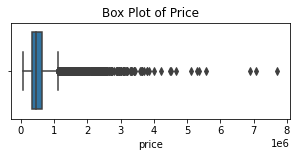

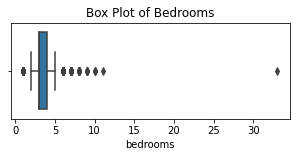

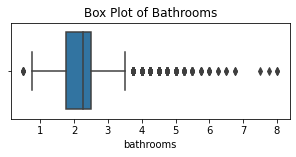

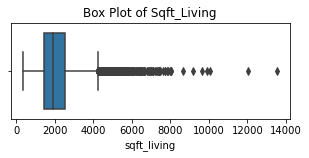

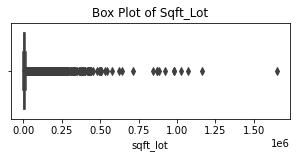

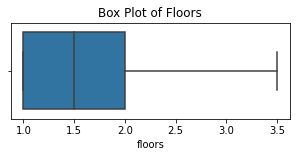

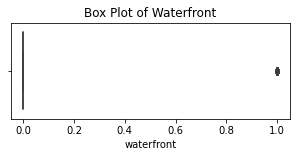

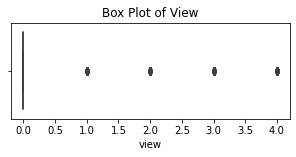

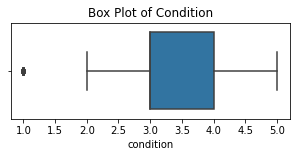

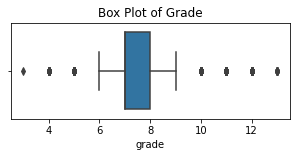

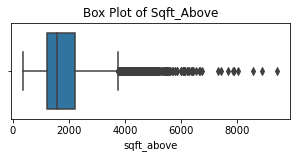

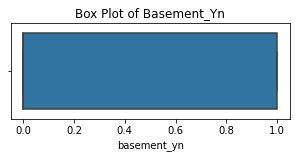

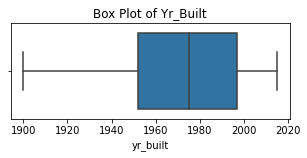

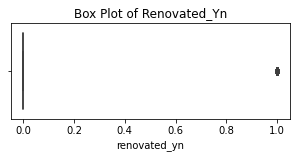

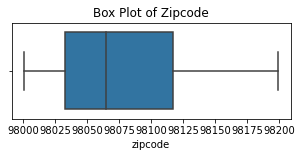

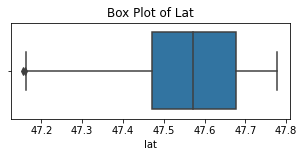

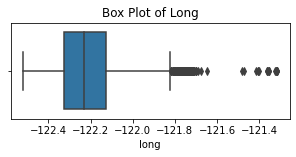

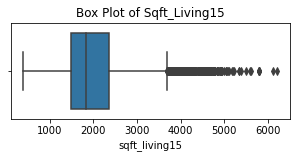

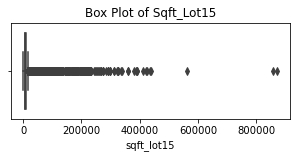

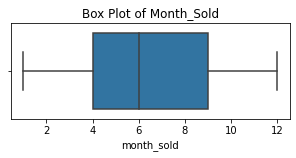

In [30]:
for col in df:
    plot_boxplots(df =df , col=col)

In [31]:
# Remove outliers using IQR method
# Code modified from https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr

def outlier_IQR(df):
    
    keep = df.describe()
    q1 = keep['25%']
    q3 = keep['75%']
    IQR = q3-q1
    outliers =(df < (q1- 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))
    return outliers

In [32]:
# Create list of columns to remove outliers from
outliers_col = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                'sqft_living15', 'sqft_lot15']
df1 = df.copy()

# Remove outliers for specified columns
for col in outliers_col:
    df1 = df1[~outlier_IQR(df1[col])]

In [33]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_yn,yr_built,renovated_yn,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold
0,"221,900.00000",3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.00000,1955,0.00000,98178,47.51120,-122.25700,1340,5650,10
1,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,1.00000,1951,1.00000,98125,47.72100,-122.31900,1690,7639,12
2,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.00000,1933,0.00000,98028,47.73790,-122.23300,2720,8062,2
3,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,1.00000,1965,0.00000,98136,47.52080,-122.39300,1360,5000,12
4,"510,000.00000",3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.00000,1987,0.00000,98074,47.61680,-122.04500,1800,7503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.00000",3,2.50000,1530,1131,3.00000,0.00000,0.00000,3,8,1530,0.00000,2009,0.00000,98103,47.69930,-122.34600,1530,1509,5
21593,"400,000.00000",4,2.50000,2310,5813,2.00000,0.00000,0.00000,3,8,2310,0.00000,2014,0.00000,98146,47.51070,-122.36200,1830,7200,2
21594,"402,101.00000",2,0.75000,1020,1350,2.00000,0.00000,0.00000,3,7,1020,0.00000,2009,0.00000,98144,47.59440,-122.29900,1020,2007,6
21595,"400,000.00000",3,2.50000,1600,2388,2.00000,0.00000,0.00000,3,8,1600,0.00000,2004,0.00000,98027,47.53450,-122.06900,1410,1287,1


In [34]:
# Drop price to only show correlation between independent variables
corr = df1.drop('price', axis=1).corr().round(2)

In [35]:
# Create mask for upper triangle of matrix
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

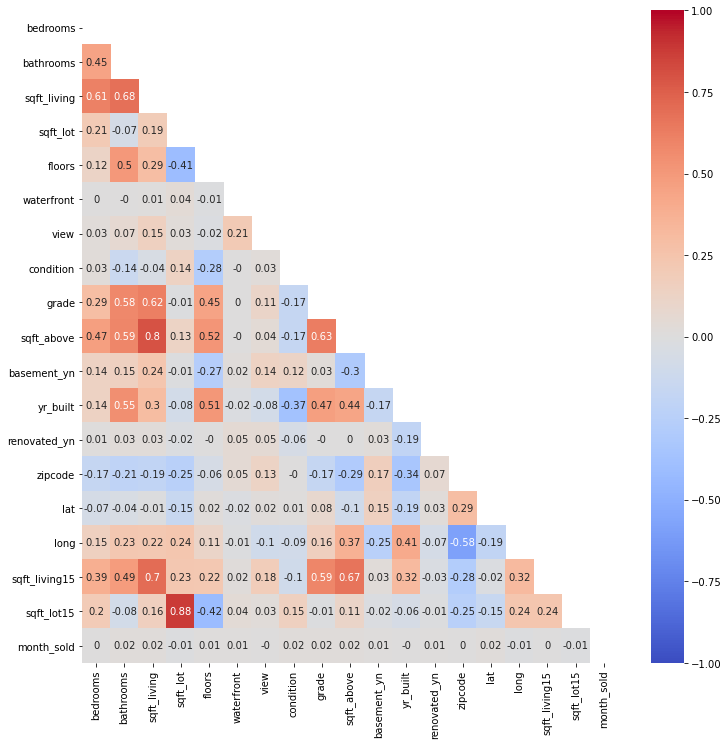

In [36]:
# Create heatmap correlation matrix
# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1,mask=mask);

## Exploratory Data Analysis (EDA)
Prior to creating and iterating regression models, we will run some EDA to help the real estate company identify which properties they prioritize to acquire in their listings.

### Question 1: Does a waterfront property worth more?

First, let's take a look at how many waterfront properties were bought/sold in 2014-2015.

In [37]:
print(len(df1[df1['waterfront'] == 1]))

15


In [38]:
len(df1[df1['waterfront'] == 1]) / len(df)

0.0007002801120448179

After removing the outliers, there are only 15 waterfront properties remaining in the DataFrame. There were only 146 houses to begin with, which shows that waterfront properties are very rare in the market.

Let's calculate how much more a waterfront property would worth on average.

In [39]:
df1.groupby('waterfront')['price'].mean().round(2)

waterfront
0.00000   452,199.75000
1.00000   796,196.67000
Name: price, dtype: float64

''

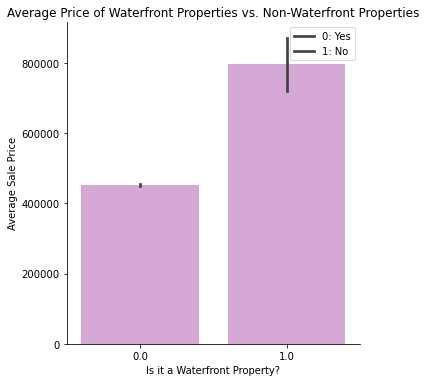

In [40]:
# Create a bar plot to visualize the difference
labels = ['0: Yes', '1: No']
sns.catplot(x="waterfront", y="price", kind="bar", data=df1, color= 'plum')
plt.title('Average Price of Waterfront Properties vs. Non-Waterfront Properties')
plt.xlabel('Is it a Waterfront Property?')
plt.ylabel('Average Sale Price')
plt.legend(labels= labels)
;

Waterfront properties are definitely in the real estate market but there are not a lot of them out there. I highly recommend securing waterfront properties whenever they are available since those worth $344,597 more on average than inland properties.

### Question 2: Does number of viewings to potential buyers affect the housing price?

In [41]:
df1_v = df1.groupby('view')['price'].mean().round(2)
df1_v

view
0.00000   440,731.37000
1.00000   605,160.79000
2.00000   604,777.25000
3.00000   647,968.04000
4.00000   795,479.17000
Name: price, dtype: float64

Text(0.5, 0, 'View')

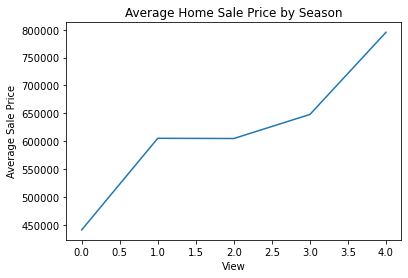

In [42]:
plt.plot(df1_v)
plt.title('Average Home Sale Price by Season')
plt.ylabel('Average Sale Price')
plt.xlabel('View')

Text(0.5, 0, 'View')

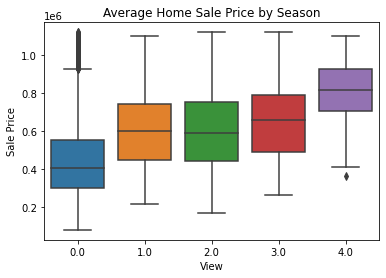

In [43]:
sns.boxplot(x= 'view', y= 'price', data= df1)
plt.title('Average Home Sale Price by Season')
plt.ylabel('Sale Price')
plt.xlabel('View')

Overall, the analysis shows that the housing price increases when more groups of people get the tour. On average, houses with the most number of viewings were sold at a price $354,748 higher than houses with 0 views. 

### Question: Does the King County grading system affect the housing price? 

In [44]:
df1_g = df1.groupby('grade')['price'].mean().round(2)
df1_g

grade
4    206,300.00000
5    237,756.98000
6    301,922.08000
7    399,963.84000
8    518,085.16000
9    668,319.31000
10   780,199.55000
11   930,000.00000
Name: price, dtype: float64

''

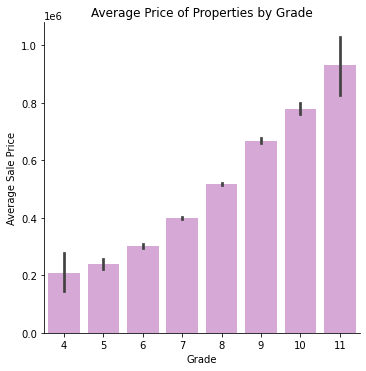

In [45]:
sns.catplot(x="grade", y="price", kind="bar", data=df1, color= 'plum')
plt.title('Average Price of Properties by Grade')
plt.xlabel('Grade')
plt.ylabel('Average Sale Price')
;

It is very evident that house prices increases with higher grade. Therefore, we should consider acquiring properties with better grade if possible.

## Model 1

For the first iteration, I wanted to run the model with all the features.

In [46]:
X = df1.drop('price', axis= 1)
y = df1['price']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1810.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:01:24   Log-Likelihood:            -2.1343e+05
No. Observations:               16401   AIC:                         4.269e+05
Df Residuals:                   16381   BIC:                         4.271e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.597e+06   1.84e+06      1.955      0.051   -8828.691     7.2e+06
bedrooms      -1.002e+04   1425.532     -7.032      0.000   -1.28e+04   -7230.434
bathrooms      1.634e+04   2209.392      7.397      0.000     1.2e+04    2.07e+04
sqft_living      62.2722      4.522     13.772      0.000      53.409      71.135
sqft_lot         -2.3433      0.562     -4.173      0.000      -3.444      -1.243
floors         1.024e+04   2579.408      3.968      0.000    5179.634    1.53e+04
waterfront     2.461e+05   2.88e+04      8.545      0.000     1.9e+05    3.03e+05
view           3.404e+04   1642.288     20.725      0.000    3.08e+04    3.73e+04
condition       2.78e+04   1459.633     19.048      0.000    2.49e+04    3.07e+04
grade          7.656e+04   1481.644     51.670      0.000    7.37e+04    7.95e+04
sqft_above       34.5297      5.008      6.895      0.000      24.714      44.346
basement_yn    2.553e+04   3307.800      7.719      0.000     1.9e+04     3.2e+04
yr_built      -1935.5366     45.319    -42.709      0.000   -2024.367   -1846.706
renovated_yn   3.471e+04   5336.430      6.505      0.000    2.43e+04    4.52e+04
zipcode        -283.0410     20.658    -13.702      0.000    -323.532    -242.550
lat            5.398e+05   6683.492     80.764      0.000    5.27e+05    5.53e+05
long          -1.546e+04   8840.263     -1.748      0.080   -3.28e+04    1870.737
sqft_living15    46.9997      2.712     17.329      0.000      41.684      52.316
sqft_lot15       -6.4893      0.642    -10.112      0.000      -7.747      -5.231
month_sold    -2477.9465    271.433     -9.129      0.000   -3009.985   -1945.908
==============================================================================
Omnibus:                     1677.157   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3346.384
Skew:                           0.668   Prob(JB):                         0.00
Kurtosis:                       4.764   Cond. No.                     2.14e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd5163c0430>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'QQ Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

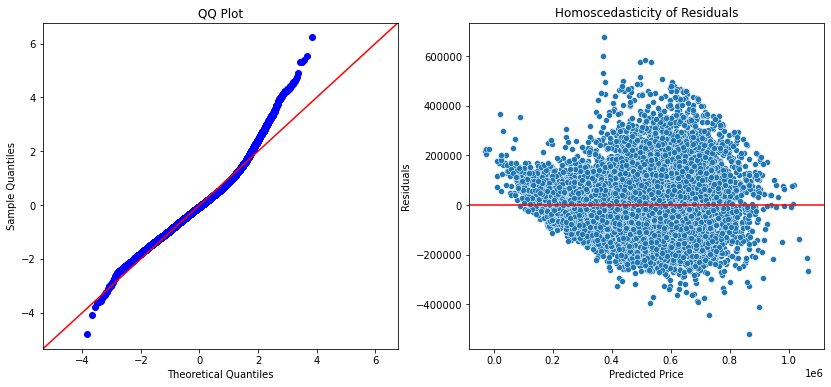

In [47]:
model_summary(df1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Train RMSE: 108743.2508875147
Test RMSE: 107671.44744237633
Train R2: 0.6740941146368746
Test R2: 0.6891813829574283


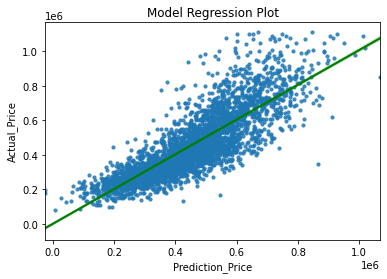

In [49]:
linear_model(X_train,y_train,X_test,y_test)

While our Q-Q plot and homoscedasticity plot are not perfect, they are not too terrible either. Given that this is the first iteration, R squared value at 0.677 is reasonable. We will use this model as a baseline model to evaluate the other models moving forward

## Model 2
For a real estate company, it is not only important to have a strong list of properties but also to understand what would attract the buyers. With that in mind, I selected features that would matter to me when buying a house. Those includes number of bedrooms and bathrooms, size of the property, basement (Y/N), when it was built, renovated (Y/N), and the neighborhood.

In [50]:
df2 = df1.drop(['floors','waterfront','view','grade','lat','long','sqft_living15','sqft_lot15','month_sold'], 
               axis =1)
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,sqft_above,basement_yn,yr_built,renovated_yn,zipcode
0,"221,900.00000",3,1.00000,1180,5650,3,1180,0.00000,1955,0.00000,98178
1,"538,000.00000",3,2.25000,2570,7242,3,2170,1.00000,1951,1.00000,98125
2,"180,000.00000",2,1.00000,770,10000,3,770,0.00000,1933,0.00000,98028
3,"604,000.00000",4,3.00000,1960,5000,5,1050,1.00000,1965,0.00000,98136
4,"510,000.00000",3,2.00000,1680,8080,3,1680,0.00000,1987,0.00000,98074
...,...,...,...,...,...,...,...,...,...,...,...
21592,"360,000.00000",3,2.50000,1530,1131,3,1530,0.00000,2009,0.00000,98103
21593,"400,000.00000",4,2.50000,2310,5813,3,2310,0.00000,2014,0.00000,98146
21594,"402,101.00000",2,0.75000,1020,1350,3,1020,0.00000,2009,0.00000,98144
21595,"400,000.00000",3,2.50000,1600,2388,3,1600,0.00000,2004,0.00000,98027


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     1134.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:01:25   Log-Likelihood:            -2.1840e+05
No. Observations:               16401   AIC:                         4.368e+05
Df Residuals:                   16390   BIC:                         4.369e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.026e+06    2.4e+06     -2.507      0.012   -1.07e+07   -1.31e+06
bedrooms     -3.372e+04   1899.396    -17.754      0.000   -3.74e+04      -3e+04
bathrooms     4.067e+04   2883.958     14.100      0.000     3.5e+04    4.63e+04
sqft_living    119.3204      5.907     20.201      0.000     107.743     130.898
sqft_lot        -9.9688      0.400    -24.949      0.000     -10.752      -9.186
condition     1.973e+04   1964.093     10.043      0.000    1.59e+04    2.36e+04
sqft_above      97.1462      6.245     15.557      0.000      84.906     109.386
basement_yn   5.741e+04   4431.336     12.954      0.000    4.87e+04    6.61e+04
yr_built     -1961.9905     56.066    -34.995      0.000   -2071.885   -1852.096
renovated_yn  2.839e+04   7175.674      3.957      0.000    1.43e+04    4.25e+04
zipcode        101.7570     24.163      4.211      0.000      54.396     149.118
==============================================================================
Omnibus:                      844.887   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.654
Skew:                           0.531   Prob(JB):                    1.43e-227
Kurtosis:                       3.632   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd515f0f7f0>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'QQ Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

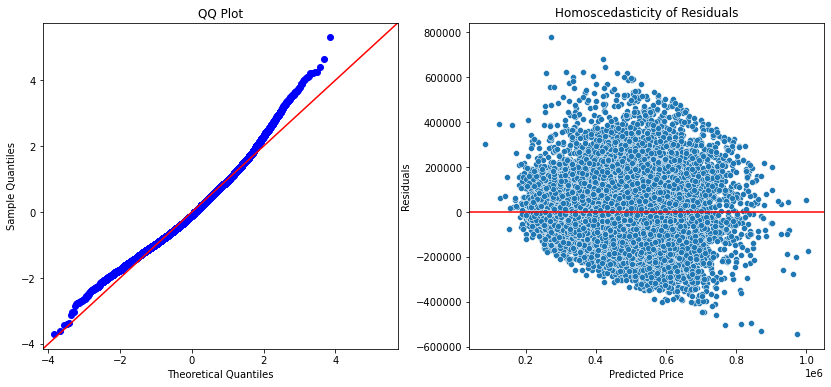

In [51]:
model_summary(df2)

In [52]:
X = df2.drop('price', axis= 1)
y = df2['price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Train RMSE: 146853.64201725935
Test RMSE: 146907.57876606
Train R2: 0.4056298065437628
Test R2: 0.4213788247103898


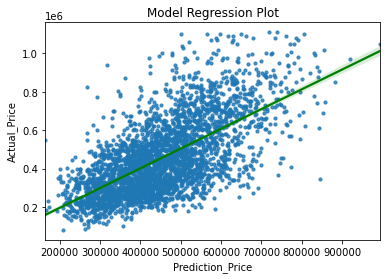

In [54]:
linear_model(X_train,y_train,X_test,y_test)

While Q-Q plot looks slightly better, this model is not so strong compared to the Model 1. Root Mean Squared Error (RMSE) increased and R squared values decreased for both train and test sets. The R squared value for the model also dropped from 0.677 to 0.409. Therefore we will not use this model.

## Model 3

For the next model, let's apply feature engineering on `zipcode` column using One Hot Encoding. There are some other categorical varialbes in our dataset, but we will only focus on `zipcode` column as the other variables are ordinal. 

In [55]:
# One Hot Encode zipcodes column
encoder = OneHotEncoder(drop='first',sparse=False)
encoder.fit(df1[['zipcode']])

ohe_vars = encoder.transform(df1[['zipcode']])

df1_ohe = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(['zipcode']),
                      index=df1.index)
df1_ohe

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [56]:
# Join One Hot Encoded dataframe with original dataframe and drop
# original zipcodes column
df3 = pd.concat([df1.drop('zipcode',axis=1),df1_ohe],axis=1)
df3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_yn,yr_built,renovated_yn,lat,long,sqft_living15,sqft_lot15,month_sold,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.00000",3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.00000,1955,0.00000,47.51120,-122.25700,1340,5650,10,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,1.00000,1951,1.00000,47.72100,-122.31900,1690,7639,12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.00000,1933,0.00000,47.73790,-122.23300,2720,8062,2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,1.00000,1965,0.00000,47.52080,-122.39300,1360,5000,12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,"510,000.00000",3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.00000,1987,0.00000,47.61680,-122.04500,1800,7503,2,0.00000,0.00000,0.00000,0.00

In [57]:
X = df3.drop('price', axis= 1)
y = df3['price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Train RMSE: 78430.46044330139
Test RMSE: 78850.49423117371
Train R2: 0.8304658831481506
Test R2: 0.8333079987436474


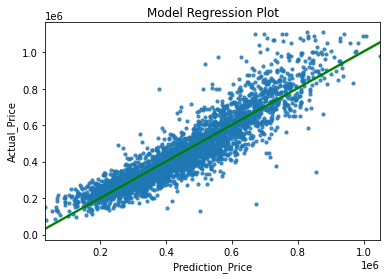

In [59]:
linear_model(X_train,y_train,X_test,y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     924.2
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:01:27   Log-Likelihood:            -2.0812e+05
No. Observations:               16401   AIC:                         4.164e+05
Df Residuals:                   16313   BIC:                         4.171e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.483e+06   4.35e+06     -0.571      0.568    -1.1e+07    6.05e+06
bedrooms      -3197.6999   1047.444     -3.053      0.002   -5250.805   -1144.595
bathrooms      1.342e+04   1609.807      8.335      0.000    1.03e+04    1.66e+04
sqft_living      66.3704      3.298     20.126      0.000      59.907      72.834
sqft_lot          1.3856      0.410      3.380      0.001       0.582       2.189
floors        -1.445e+04   1952.007     -7.405      0.000   -1.83e+04   -1.06e+04
waterfront      2.71e+05   2.11e+04     12.866      0.000     2.3e+05    3.12e+05
view           3.437e+04   1215.597     28.275      0.000     3.2e+04    3.68e+04
condition      2.423e+04   1084.894     22.330      0.000    2.21e+04    2.64e+04
grade          4.184e+04   1150.036     36.379      0.000    3.96e+04    4.41e+04
sqft_above       57.9081      3.670     15.781      0.000      50.716      65.101
basement_yn    8830.6732   2424.252      3.643      0.000    4078.875    1.36e+04
yr_built       -523.8568     37.384    -14.013      0.000    -597.133    -450.580
renovated_yn   3.638e+04   3888.101      9.356      0.000    2.88e+04     4.4e+04
lat           -1.961e+04   3.98e+04     -0.492      0.623   -9.77e+04    5.85e+04
long          -3.327e+04    3.3e+04     -1.009      0.313   -9.79e+04    3.14e+04
sqft_living15    27.6707      2.050     13.501      0.000      23.653      31.688
sqft_lot15        0.0352      0.497      0.071      0.944      -0.939       1.009
month_sold    -2563.9970    197.105    -13.008      0.000   -2950.344   -2177.650
zipcode_98002  1.221e+04   7831.822      1.559      0.119   -3141.097    2.76e+04
zipcode_98003   -99.8721   7149.040     -0.014      0.989   -1.41e+04    1.39e+04
zipcode_98004  5.216e+05    1.5e+04     34.681      0.000    4.92e+05    5.51e+05
zipcode_98005  3.387e+05   1.54e+04     21.971      0.000    3.08e+05    3.69e+05
zipcode_98006  2.741e+05   1.28e+04     21.466      0.000    2.49e+05    2.99e+05
zipcode_98007  2.575e+05   1.56e+04     16.558      0.000    2.27e+05    2.88e+05
zipcode_98008  2.463e+05   1.51e+04     16.287      0.000    2.17e+05    2.76e+05
zipcode_98010  7.439e+04    1.6e+04      4.653      0.000    4.31e+04    1.06e+05
zipcode_98011  1.539e+05   1.96e+04      7.859      0.000    1.16e+05    1.92e+05
zipcode_98014  1.388e+05   2.87e+04      4.833      0.000    8.25e+04    1.95e+05
zipcode_98019  1.092e+05   2.18e+04      4.996      0.000    6.63e+04    1.52e+05
zipcode_98022  8735.9373   1.28e+04      0.681      0.496   -1.64e+04    3.39e+04
zipcode_98023 -1.908e+04   6949.723     -2.745      0.006   -3.27e+04   -5455.303
zipcode_98024  1.657e+05   2.44e+04      6.797      0.000    1.18e+05    2.13e+05
zipcode_98027  2.376e+05   1.39e+04     17.054      0.000     2.1e+05    2.65e+05
zipcode_98028  1.395e+05   1.91e+04      7.301   

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd515e8db50>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'QQ Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

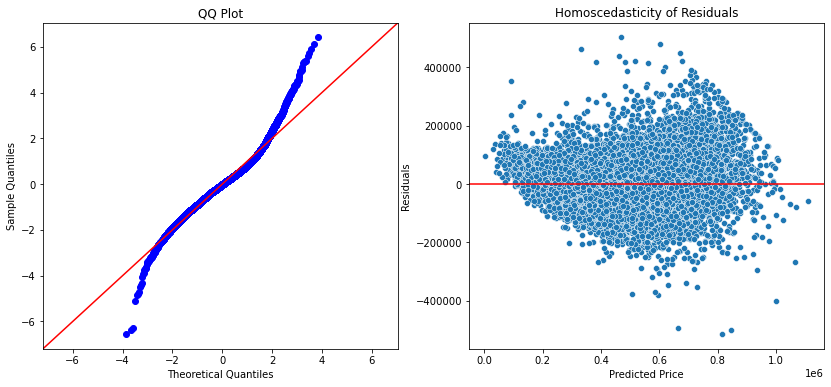

In [60]:
model_summary(df3)

The model has improved significantly - RMSE decreased and R squared values increased significantly with no a big difference between train and test sets. Homoscedasticity plot also looks slightly better for this model. Q-Q plot does not look as great as those from the previous iteratioins but it is not too bad either.

## Model 4
Since Model 3 with One Hot Encoding worked very well, I wanted to re-visit the selected features that were used in Model 2 and apply the selection for the next model.

In [61]:
df4 = df3.drop(['floors','waterfront','view','grade','lat','long','sqft_living15','sqft_lot15','month_sold'],
               axis =1)
df4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,sqft_above,basement_yn,yr_built,renovated_yn,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,"221,900.00000",3,1.00000,1180,5650,3,1180,0.00000,1955,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,"538,000.00000",3,2.25000,2570,7242,3,2170,1.00000,1951,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,"180,000.00000",2,1.00000,770,10000,3,770,0.00000,1933,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,"604,000.00000",4,3.00000,1960,5000,5,1050,1.00000,1965,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,"510,000.00000",3,2.00000,1680,8080,3,1680,0.00000,1987,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0

In [62]:
X = df4.drop('price', axis= 1)
y = df4['price']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Train RMSE: 86779.57667434774
Test RMSE: 86934.82756743295
Train R2: 0.7924500498272671
Test R2: 0.7973747726655287


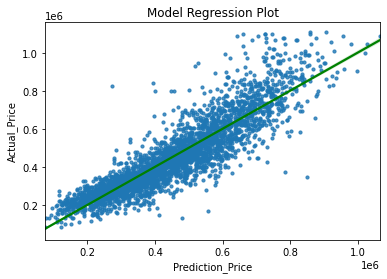

In [64]:
linear_model(X_train,y_train,X_test,y_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     805.4
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:01:28   Log-Likelihood:            -2.0976e+05
No. Observations:               16401   AIC:                         4.197e+05
Df Residuals:                   16322   BIC:                         4.203e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.678e+05   7.52e+04      3.563      0.000     1.2e+05    4.15e+05
bedrooms      -1.083e+04   1147.206     -9.439      0.000   -1.31e+04   -8579.504
bathrooms      1.607e+04   1729.961      9.289      0.000    1.27e+04    1.95e+04
sqft_living     101.2077      3.527     28.698      0.000      94.295     108.120
sqft_lot          3.6995      0.297     12.475      0.000       3.118       4.281
condition      2.294e+04   1193.609     19.217      0.000    2.06e+04    2.53e+04
sqft_above       76.3699      3.743     20.405      0.000      69.034      83.706
basement_yn    1.672e+04   2666.082      6.271      0.000    1.15e+04    2.19e+04
yr_built       -213.0766     37.310     -5.711      0.000    -286.209    -139.944
renovated_yn   4.176e+04   4270.629      9.779      0.000    3.34e+04    5.01e+04
zipcode_98002 -1691.0294   8399.019     -0.201      0.840   -1.82e+04    1.48e+04
zipcode_98003  1.522e+04   7756.226      1.962      0.050      12.261    3.04e+04
zipcode_98004  5.405e+05   9597.484     56.322      0.000    5.22e+05    5.59e+05
zipcode_98005  3.566e+05   1.04e+04     34.433      0.000    3.36e+05    3.77e+05
zipcode_98006  3.035e+05   7404.742     40.984      0.000    2.89e+05    3.18e+05
zipcode_98007  2.723e+05   9585.102     28.413      0.000    2.54e+05    2.91e+05
zipcode_98008  2.625e+05   7771.487     33.773      0.000    2.47e+05    2.78e+05
zipcode_98010  4.435e+04   1.49e+04      2.970      0.003    1.51e+04    7.36e+04
zipcode_98011  1.548e+05   8669.019     17.857      0.000    1.38e+05    1.72e+05
zipcode_98014  9.311e+04   1.93e+04      4.823      0.000    5.53e+04    1.31e+05
zipcode_98019  8.348e+04   9380.058      8.899      0.000    6.51e+04    1.02e+05
zipcode_98022  7056.0204   9109.817      0.775      0.439   -1.08e+04    2.49e+04
zipcode_98023 -3092.8962   6843.523     -0.452      0.651   -1.65e+04    1.03e+04
zipcode_98024  1.255e+05   2.02e+04      6.213      0.000    8.59e+04    1.65e+05
zipcode_98027  2.445e+05   8087.912     30.231      0.000    2.29e+05     2.6e+05
zipcode_98028  1.455e+05   7812.107     18.628      0.000     1.3e+05    1.61e+05
zipcode_98029  2.581e+05   7581.261     34.045      0.000    2.43e+05    2.73e+05
zipcode_98030  8370.1337   7821.979      1.070      0.285   -6961.800    2.37e+04
zipcode_98031  1.641e+04   7737.647      2.121      0.034    1245.152    3.16e+04
zipcode_98032  7514.0468   9983.471      0.753      0.452   -1.21e+04    2.71e+04
zipcode_98033   3.33e+05   7284.089     45.717      0.000    3.19e+05    3.47e+05
zipcode_98034  1.946e+05   6686.879     29.108      0.000    1.82e+05    2.08e+05
zipcode_98038  3.531e+04   6752.524      5.229      0.000    2.21e+04    4.85e+04
zipcode_98039  6.759e+05   3.93e+04     17.213      0.000    5.99e+05    7.53e+05
zipcode_98040  4.628e+05   9703.645     47.693   

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd5149735b0>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'QQ Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

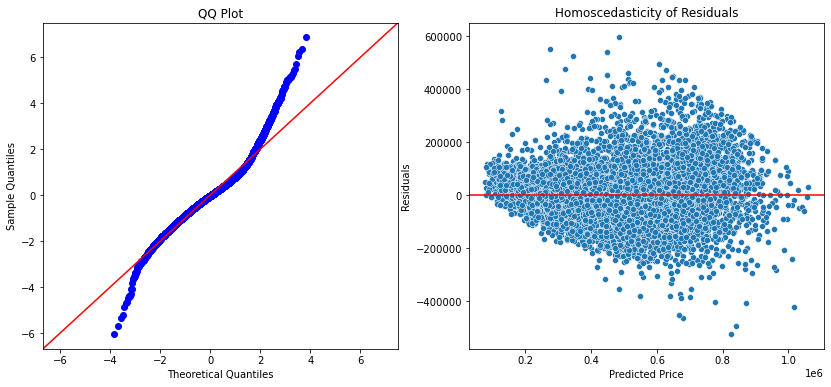

In [65]:
model_summary(df4)

Given that this model also uses selected features, it is a pretty strong model compared to the Model 2. However, Model 3 still shows the best result.

## Model 5
For our last model, we will use the log transormation on the continuous variables.

In [66]:
# Create a temporary table to select continuous variable which we will run log trasformation on.
temp = df3.copy()

In [67]:
temp.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'basement_yn',
       'yr_built', 'renovated_yn', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcod

In [68]:
# Select the continuous variables
con = ['sqft_living','sqft_lot','yr_built','sqft_living15','sqft_lot15']

df_con = temp[con]

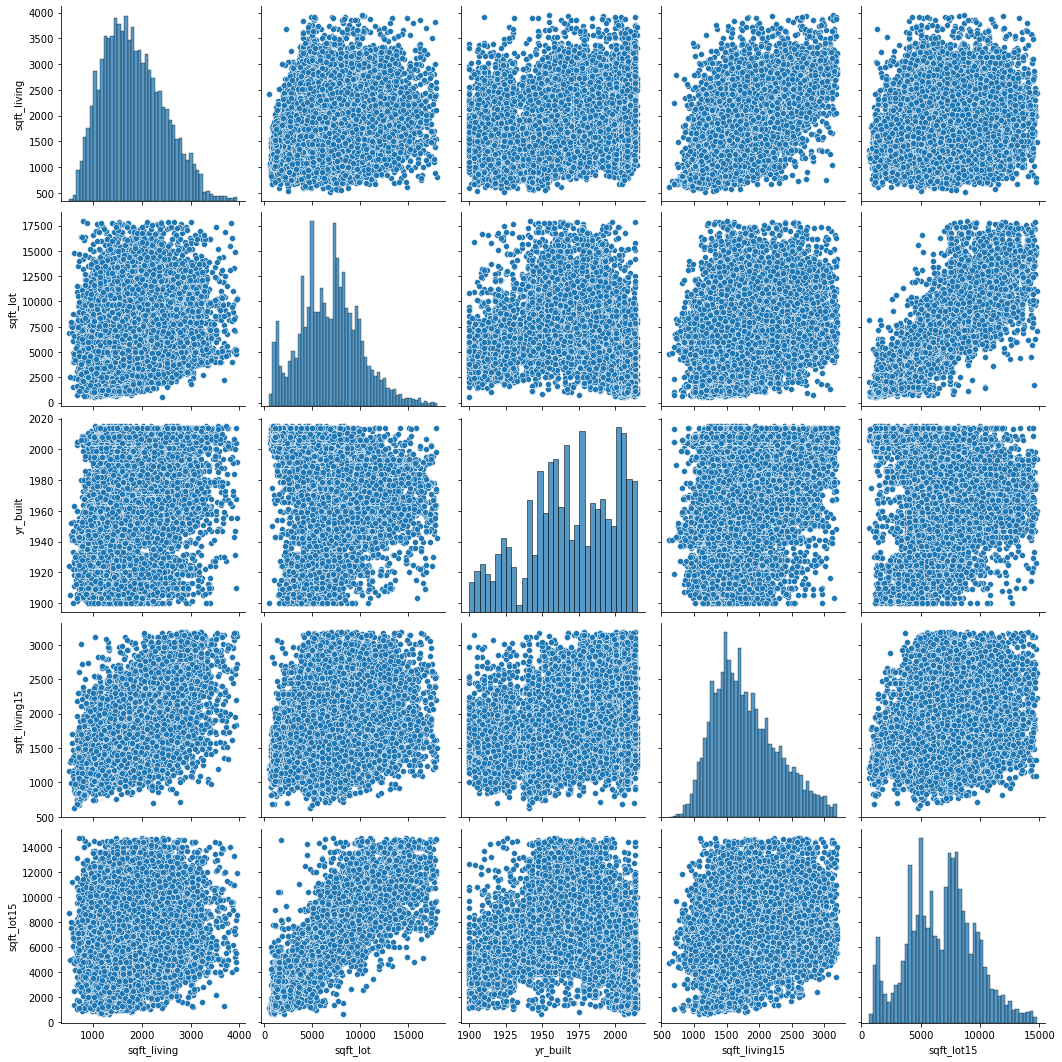

In [69]:
# Create a pairplot to check variable distributions
cont_pp = sns.pairplot(df_con, height = 3)

In [70]:
# Run the log transformation on the selected continuous variables
log_names = [f'{column}_log' for column in df_con.columns]

df_con_log = np.log(df_con)
df_con_log.columns = log_names

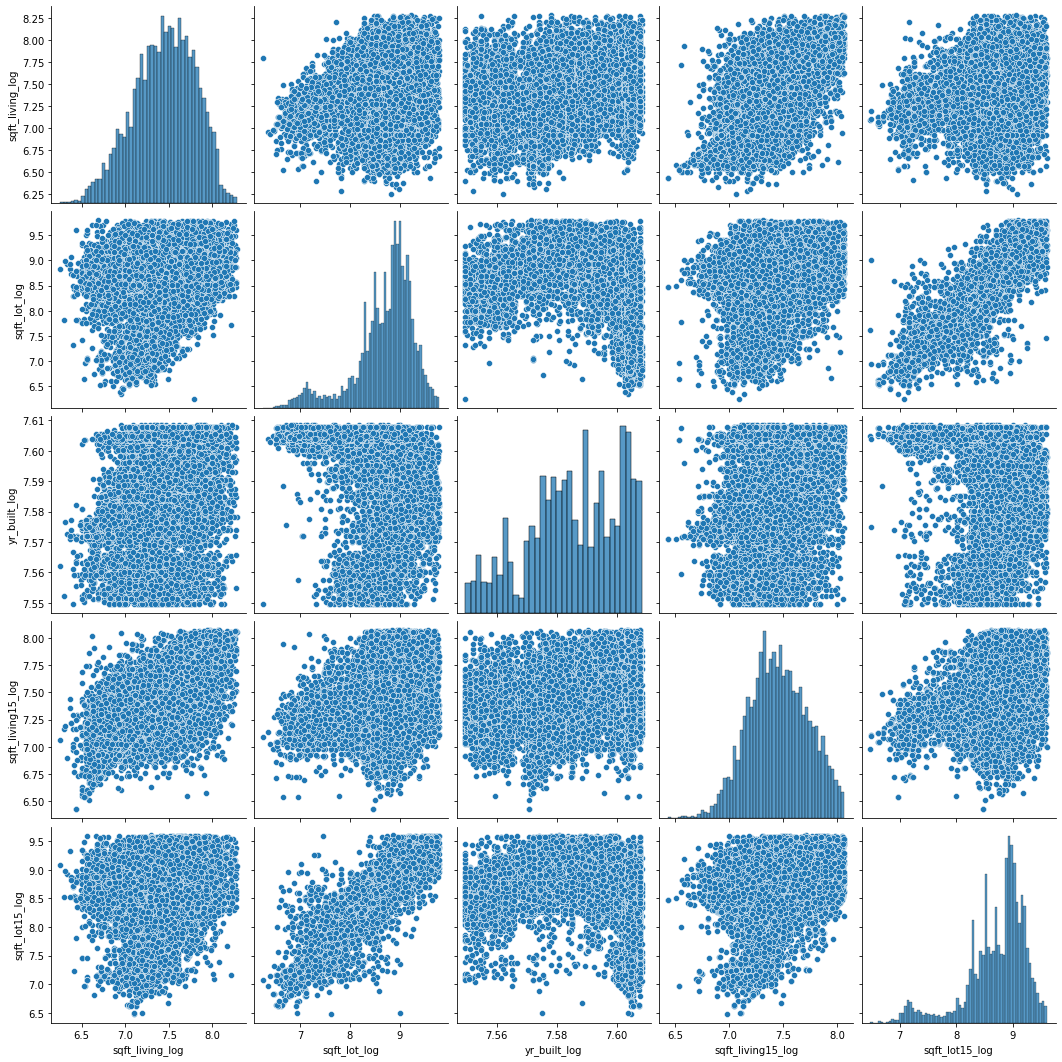

In [71]:
# Run another pairplot after the log transformation
cont_pp2 = sns.pairplot(df_con_log, height= 3)

In [72]:
# Add the log-transformed columns into a DataFrame
df6 = pd.concat([df_con_log, temp], axis= 1)
df6.head()

,sqft_living_log,sqft_lot_log,yr_built_log,sqft_living15_log,sqft_lot15_log,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement_yn,yr_built,renovated_yn,lat,long,sqft_living15,sqft_lot15,month_sold,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7.07327,8.63941,7.57815,7.20042,8.63941,"221,900.00000",3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.00000,1955,0.00000,47.51120,-122.25700,1340,5650,10,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1,7.85166,8.88765,7.57610,7.43248,8.94102,"538,000.00000",3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,1.00000,1951,1.00000,47.72100,-122.31900,1690,7639,12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,6.64639,9.21034,7.56683,7.90839,8.99492,"180,000.00000",2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.00000,1933,0.00000,47.73790,-122.23300,2720,8062,2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,7.58070,8.51719,7.58325,7.21524,8.51719,"604,000.00000",4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,1.00000,1965,0.00000,47.52080,-122.39300,1360,5000,12,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.000

In [73]:
# Drop the original columns that we ran log transformation on
df6.drop(columns= ['yr_built', 'sqft_living', 'sqft_lot'], inplace= True)

In [74]:
X = df6.drop('price', axis= 1)
y = df6['price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     924.2
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        18:12:04   Log-Likelihood:            -2.0796e+05
No. Observations:               16401   AIC:                         4.161e+05
Df Residuals:                   16311   BIC:                         4.168e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.063e+05   4.36e+06     -0.093      0.926   -8.96e+06    8.15e+06
sqft_living_log    7.151e+04   5684.529     12.579      0.000    6.04e+04    8.26e+04
sqft_lot_log       3.541e+04   2737.670     12.934      0.000       3e+04    4.08e+04
yr_built_log      -6.157e+05   7.53e+04     -8.181      0.000   -7.63e+05   -4.68e+05
sqft_living15_log -1.372e+05   1.48e+04     -9.269      0.000   -1.66e+05   -1.08e+05
sqft_lot15_log     5.833e+04   4514.221     12.922      0.000    4.95e+04    6.72e+04
bedrooms          -3543.6082   1054.682     -3.360      0.001   -5610.900   -1476.316
bathrooms          1.663e+04   1608.866     10.333      0.000    1.35e+04    1.98e+04
floors             1183.7340   2094.150      0.565      0.572   -2921.029    5288.497
waterfront         2.819e+05   2.09e+04     13.510      0.000    2.41e+05    3.23e+05
view               3.499e+04   1203.816     29.063      0.000    3.26e+04    3.73e+04
condition          2.529e+04   1076.465     23.495      0.000    2.32e+04    2.74e+04
grade              4.347e+04   1145.109     37.962      0.000    4.12e+04    4.57e+04
sqft_above           65.5744      3.544     18.505      0.000      58.628      72.520
basement_yn        2.493e+04   2438.916     10.222      0.000    2.01e+04    2.97e+04
renovated_yn       3.856e+04   3852.942     10.008      0.000     3.1e+04    4.61e+04
lat               -5.007e+04   3.95e+04     -1.267      0.205   -1.28e+05    2.74e+04
long              -5.524e+04   3.27e+04     -1.690      0.091   -1.19e+05    8825.497
sqft_living15       102.5084      8.362     12.259      0.000      86.118     118.899
sqft_lot15          -12.0365      0.743    -16.205      0.000     -13.492     -10.581
month_sold        -2592.0626    195.244    -13.276      0.000   -2974.762   -2209.363
zipcode_98002      1.411e+04   7763.819      1.818      0.069   -1106.219    2.93e+04
zipcode_98003      1550.7781   7082.233      0.219      0.827   -1.23e+04    1.54e+04
zipcode_98004      5.472e+05   1.49e+04     36.611      0.000    5.18e+05    5.77e+05
zipcode_98005      3.671e+05   1.53e+04     23.953      0.000    3.37e+05    3.97e+05
zipcode_98006      2.944e+05   1.27e+04     23.200      0.000     2.7e+05    3.19e+05
zipcode_98007      2.783e+05   1.54e+04     18.038      0.000    2.48e+05    3.09e+05
zipcode_98008      2.685e+05    1.5e+04     17.890      0.000    2.39e+05    2.98e+05
zipcode_98010      8.441e+04   1.58e+04      5.329      0.000    5.34e+04    1.15e+05
zipcode_98011      1.734e+05   1.94e+04      8.925      0.000    1.35e+05    2.11e+05
zipcode_98014      1.621e+05   2.85e+04      5.691      0.000    1.06e+05    2.18e+05
zipcode_98019      1.329e+05   2.17e+04      6.132      0.000    9.04e+04    1.75e+05
zipcode_98022      1.258e+04   1.27e+04      0.989      0.323   -1.23e+04

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd4ffa9bd00>,
 <Figure size 1008x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'QQ Plot'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>,
        <AxesSubplot:title={'center':'Homoscedasticity of Residuals'}, xlabel='Predicted Price', ylabel='Residuals'>],
       dtype=object))

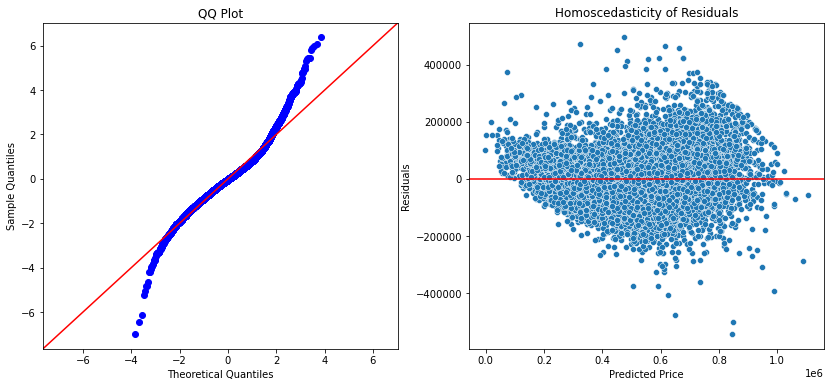

In [76]:
model_summary(df6)

Train RMSE: 77304.7518359997
Test RMSE: 77625.57988484518
Train R2: 0.8352975878631244
Test R2: 0.8384467735185451


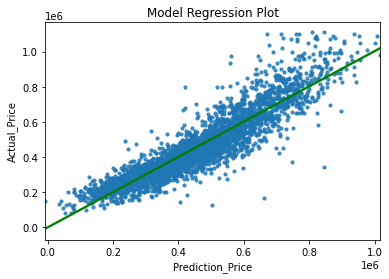

In [80]:
linear_model(X_train, y_train, X_test, y_test)

## Conclusions Placeholder
This analysis leads to three recommendations for creating movies :

**1. Release movies in May, June, July, November, or December.** Our analysis shows that summertime and holiday seasons are the best time of year to release a movie. If Microsoft wants to release a movie across the world simultaneously, I recommend launching a movie in June or July. If different timeline can be applied, release a movie in the States in May first, then internationally in June.

**2. Produce a movie in Mystery, Horror, Animation genres.** Microsoft has the capability to run movie business in many countries as it has many locations worldwide. Therefore, I recommend producing a movie in Mystery, Horror, and Animation to target audience globally.

**3. Recruit people with proven stats.** I provided lists of top 10 actors and directors in top 3 genres that generated the most profit. Microsoft should contact these individuals and try to recruit them to enter this competitive movie industry

## Next Steps Placeholder
Further analyses could lead to additional insights:
* **ROI Trend in Popular Genres**: while we have identified which top 3 genres have generated the most profit, such analysis can provide whether the business is continuously growing in those genres over time.
* **Ideal Budget Range**: This modeling could predict the ideal production budget for the movies that Microsoft wants to produce.